# The Characteristic Equation

In [14]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
print('')

In [15]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

We continue our study of _linear dynamical systems_, systems that evolve according to the equation:

$$\vx_{k+1} = A\vx_k.$$

A = 
 [[ 0.99500417 -0.09983342]
 [ 0.09983342  0.99500417]]


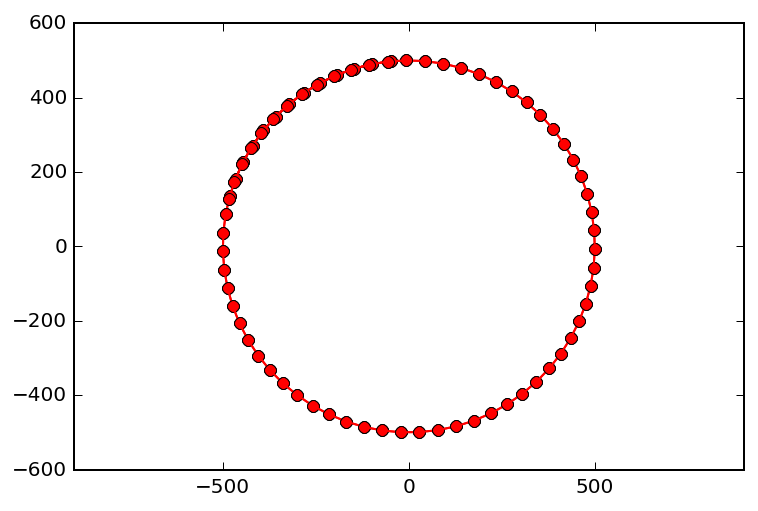

In [16]:
sl.hide_code_in_slideshow()
import matplotlib.animation as animation
A = np.array([[np.cos(0.1),-np.sin(0.1)],[ np.sin(0.1),np.cos(0.1)]])
# A = np.array([[1.1, 0],[0, 0.9]])
# A = np.array([[0.8, 0.5],[-0.1, 1.0]])

# we are putting x into an array so that it can be read inside the
# animate() closure.   Currently can only read env variables in a closure
x = [np.array([1,500.])]

fig = plt.figure()
ax = plt.axes(xlim=(-500,500),ylim=(-500,500))
plt.plot(-500, -500,'')
plt.plot(500, 500,'')
plt.axis('equal')

lines = ax.plot([],[],'o-')

xvals = []
yvals = []

# this is the routine that will be called on each timestep
def animate(i):
    newx = A.dot(x[0])
    plt.plot([x[0][0],newx[0]],[x[0][1],newx[1]],'r-')
    plt.plot(newx[0],newx[1],'ro')
    x[0] = newx
    xvals.append(x[0][0])
    yvals.append(x[0][1])
    lines[0].set_data(xvals,yvals)
    fig.canvas.draw()

print('A = \n',A)
# instantiate the animator.
# we are animating at 3Hz
anim = animation.FuncAnimation(fig, animate, 
                                    frames=75, interval=1000, repeat=False, blit=False)
# this function requires ffmpeg to be installed on your system
sl.display_animation(anim)

In the last lecture we saw that, if we know an eigenvalue $\lambda$ of a matrix $A,$ then computing the corresponding eigenspace can be done by constructing a basis for $\nul\ (A-\lambda I).$

Today we'll discuss how to determine the eigenvalues of a matrix $A$.

The theory will make use of the _determinant_ of a matrix.

Let's recall that the determinant of a $2\times 2$ matrix $A = \mat{{rr}a&b\\c&d}$ is $ad-bc.$

We also have learned that $A$ is invertible if and only if its determinant is not zero.    (Recall that the inverse of of $A$ is $\frac{1}{ad-bc}\mat{{cc}d&-b\\-c&a}).$

Let's use these facts to help us find the eigenvalues of a $2\times 2$ matrix.

__Example.__  Find the eigenvalues of $A = \mat{{rr}2&3\\3&-6}.$

__Solution.__  We must find all scalars $\lambda$ such that the matrix equation

$$(A-\lambda I)\vx = {\bf 0}$$

has a nontrivial solution.   

By the Invertible Matrix Theorem, this problem is equivalent to finding all $\lambda$ such that the matrix $A-\lambda I$ is _not_ invertible.

Now,

$$ A - \lambda I = \mat{{rr}2&3\\3&-6} - \mat{{rr}\lambda&0\\0&\lambda} = \mat{{cc}2-\lambda&3\\3&-6-\lambda}.$$

We know that $A$ is not invertible exactly when its determinant is zero.   

So the eigenvalues of $A$ are the solutions of the equation

$$\det(A-\lambda I) = \det\mat{{cc}2-\lambda&3\\3&-6-\lambda} = 0.$$

Since $\det\mat{{rr}a&b\\c&d} = ad-bc,$ then

$$\det(A-\lambda I) = (2-\lambda)(-6-\lambda)-(3)(3)$$

$$ = -12 + 6\lambda -2\lambda + \lambda^2 - 9$$

$$= \lambda^2+4\lambda-21$$

$$=(\lambda-3)(\lambda + 7)$$

If $\det(A-\lambda I) = 0,$ then $\lambda = 3$ or $\lambda = 7.$  So the eigenvalues of $A$ are $3$ and $-7$.

## Question Time! Q17.1

The same idea works for $n\times n$ matrices -- but, for that, we need to define a _determinant_ for larger matrices.

__Determinants.__

Previously, we've defined a determinant for a $2\times 2$ matrix.   

To find eigenvalues for larger matrices, we need to define the determinant for any sized (ie, $n\times n$) matrix.

__Definition.__   Let $A$ be an $n\times n$ matrix, and let $U$ be any echelon form obtained from $A$ by row replacements and row interchanges (no row scalings), and let $r$ be the number of such row interchanges.

Then the __determinant__ of $A$, written as $\det A$, is $(-1)^r$ times the product of the diagonal entries $u_{11},\dots,u_{nn}$ in $U$.

If $A$ is invertible, then $u_{11},\dots,u_{nn}$ are all _pivots_.  

If $A$ is not invertible, then at least one diagonal entry is zero, and so the product $u_{11} \dots u_{nn}$ is zero.

In other words:

$$\det\ A = \left\{\begin{array}{ll}(-1)^r\cdot\left(\mbox{product of pivots in $U$}\right),&\mbox{when $A$ is invertible}\\
0,&\mbox{when $A$ is not invertible}\end{array}\right.$$

__Example.__  Compute $\det A$ for $A = \mat{{rrr}1&5&0\\2&4&-1\\0&-2&0}.$

__Solution.__  The following row reduction uses __one__ row interchange:

$$A \sim \mat{{rrr}1&5&0\\0&-6&-1\\0&-2&0} \sim \mat{{rrr}1&5&0\\0&-2&0\\0&-6&-1} \sim \mat{{rrr}1&5&0\\0&-2&0\\0&0&-1}.$$

So $\det A$ equals $(-1)^1(1)(-2)(-1) = (-2).$  

The remarkable thing is that __any other__ way of computing the echelon form gives the same determinant.  For example,  this row reduction does not use a row interchange:

$$A \sim \mat{{rrr}1&5&0\\0&-6&-1\\0&-2&0} \sim \mat{{rrr}1&5&0\\0&-6&-1\\0&0&1/3}.$$

Using this echelon form to compute the determinant yields $(-1)^0(1)(-6)(1/3) = -2,$ the same as before.

## Question Time! Q17.2

__Invertibility.__

The formula for the determinant shows that $A$ is invertible if and only if $\det A$ is nonzero.   

We have __yet another__ part to add to the Invertible Matrix Theorem:

Let $A$ be an $n\times n$ matrix.   Then $A$ is invertible if and only if:

1. The number 0 is _not_ an eigenvalue of $A$.
2. The determinant of $A$ is _not_ zero.

Some facts about determinants (proved in the book):

1. $\det AB = (\det A) (\det B).$
1. $\det A^T = \det A.$
1. If $A$ is triangular, then $\det A$ is the product of the entries on the main diagonal of $A$.

## The Characteristic Equation

So, $A$ is invertible if and only if $\det A$ is not zero.

To return to the question of how to compute eigenvalues of $A,$ recall that $\lambda$ is an eigenvalue if and only if $(A-\lambda I)$ is _not_ invertible.

We capture this fact using the __characteristic equation:__

$$\det(A-\lambda I) = 0.$$

We can conclude that $\lambda$ is an eigenvalue of an $n\times n$ matrix $A$ if and only if $\lambda$ satisfies the characteristic equation $\det(A-\lambda I) = 0.$

__Example.__  Find the characteristic equation of 

$$A = \mat{{rrrr}5&-2&6&-1\\0&3&-8&0\\0&0&5&4\\0&0&0&1}$$

__Solution.__  Form $A - \lambda I,$ and note that $\det A$ is the product of the entries on the diagonal of $A,$ if $A$ is triangular.

$$\det(A-\lambda I) = \det\mat{{cccc}5-\lambda&-2&6&-1\\0&3-\lambda&-8&0\\0&0&5-\lambda&4\\0&0&0&1-\lambda}$$

$$=(5-\lambda)(3-\lambda)(5-\lambda)(1-\lambda).$$

So the characteristic equation is:

$$(\lambda-5)^2(\lambda-3)(\lambda-1) = 0.$$

Expanding this out we get:

$$\lambda^4 - 14\lambda^3 + 68 \lambda^2 - 130\lambda + 75 = 0.$$

Notice that, once again, $\det(A-\lambda I)$ is a polynomial in $\lambda$.

In fact, for any $n\times n$ matrix, $\det(A-\lambda I)$ is a polynomial of degree $n$, called the __characteristic polynomial__ of $A$.

We say that the eigenvalue 5 in this example has __multiplicity__ 2, because $(\lambda -5)$ occures two times as a factor of the characteristic polynomial.   In general, the mutiplicity fo an eigenvalue $\lambda$ is its multiplicity as a root of the characteristic equation.

__Example.__  The characteristic polynomial of a $6\times 6$ matrix is $\lambda^6 - 4\lambda^5 - 12\lambda^4.$  Find the eigenvalues and their multiplicity.

__Solution__  Factor the polynomial

$$\lambda^6 - 4\lambda^5 - 12\lambda^4 = \lambda^4(\lambda^2-4\lambda-12) = \lambda^4(\lambda-6)(\lambda+2)$$

So the eigenvalues are 0 (with multiplicity 4), 6, and -2.

Since the characteristic polynomial for an $n\times n$ matrix has degree $n,$ the equation has $n$ roots, counting multiplicities -- provided complex numbers are allowed.

Note that even for a real matrix, eigenvalues may sometimes be complex.

__Practical Issues.__

These facts show that there is, in principle, a way to find eigenvalues of any matrix.   However, you need not compute eigenvalues for matrices larger than $2\times 2$ by hand.   For any matrix $3\times 3$ or larger, you should use a computer.

## Similarity

An important concept for things that come later is the notion of __similar__ matrices.

__Definition.__ If $A$ and $B$ are $n\times n$ matrices, then $A$ __is similar to__ $B$ if there is an invertible matrix $P$ sch that $P^{-1}AP = B,$ or, equivalently, $A = PBP^{-1}.$ 

 Similarity is symmetric, so if $A$ is similar to $B$, then $B$ is similar to $A$.  Hence we just say that $A$ and $B$ __are similar.__
 
Changing $A$ into $B$ is called a __similarity transformation.__

An important way to think of similarity between $A$ and $B$ is that they __have the same eigenvalues.__

__Theorem.__  IF $n\times n$ matrices $A$ and $B$ are similar, then they have the same characteristic polynomial, and hence the same eigenvalues (with the same multiplicities.)

__Proof.__  If $B = P^{-1}AP,$ then

$$B - \lambda I = P^{-1}AP - \lambda P^{-1}P$$

$$ = P^{-1}(AP-\lambda P)$$

$$ = P^{-1}(A-\lambda I)P$$

Now let's construct the characteristic polynomial by taking the determinant:

$$\det(B-\lambda I) = \det[P^{-1}(A-\lambda I)P]$$

Using the properties of determinants we discussed earlier, we compute:

$$ = \det(P^{-1})\cdot\det(A-\lambda I)\cdot\det(P).$$

Since $\det(P^{-1})\cdot\det(P) = \det(P^{-1}P) = \det I = 1,$ we can see that 

$$\det(B-\lambda I) = \det(A - \lambda I).$$

## Question Time! Q17.3

## Markov Chains

Let's return to the problem of solving a Markov Chain.  

At this point, we can place the theory of Markov Chains into the broader context of eigenvalues and eigenvectors.

__Theorem.__ The largest eigenvalue of a Markov Chain is 1.

__Proof.__ It is obvious that 1 is an eigenvalue of a Markov chain since we know that every Markov Chain $A$ has a steady-state vector $\vv$ such that $A\vv = \vv.$|

To prove that 1 is the largest eigenvalue, recall that each column of a Markov Chain sums to 1. 

Then, consider the sum of the values in the vector $A\vx$.

$$A\vx = \mat{{ccc}a_{11}&\dots &a_{1n}\\\vdots&\ddots&\vdots\\a_{n1}&\dots&a_{nn}}\mat{{c}x_1\\\vdots\\x_n} = \mat{{c}a_{11}x_1 + \dots + a_{1n}x_n\\\vdots\\ a_{n1}x_1 + \dots + a_{nn}x_n}.$$

Let's just sum the first terms in each component of $A\vx$: 

$$ a_{11}x_1 + a_{21}x_1 + \dots + a_{n1}x_1 = x_1 \sum_i a_{i1} = x_1. $$

So we can see that the sum of all terms in $A\vx$ is equal to $x_1 + x_2 + \dots + x_n$ -- i.e., the sum of all terms in $\vx$.  

So there can be no $\lambda > 1$ such that $A\vx = \lambda \vx.$

__A complete solution for the evolution of a Markov Chain.__

Previously, we were only able to ask about the "eventual" steady state of a Markov Chain.  

But a crucial question is: __how long does it take__ for a particular Markov Chain to reach steady state from some initial starting condition?

Let's use an example: we previously studied the Markov Chain defined by $A = \mat{{rr}0.95&0.03\\0.05&0.97}.$  

Let's ask how long until it reaches steady state, from the starting point defined as $\vx_0 = \mat{{r}0.6\\0.4}.$

Using the methods we studied today, we can find the characteristic equation:
    
$$\lambda^2 -1.92\lambda +0.92 $$

Using the quadratic formula, we find the roots of this equation to be 1 and 0.92.  (Note that, as expected, 1 is the largest eigenvalue.)

Next, using the methods in the previous lecture, we find a basis for each eigenspace of $A$ (each nullspace of $A-\lambda I$).  

For $\lambda = 1$, a corresponding eigenvector is $\vv_1 = \mat{{r}3\\5}.$

For $\lambda = 0.92$, a corresponding eigenvector is $\vv_2 = \mat{{r}1\\-1}.$

Next, we write $\vx_0$ as a linear combination of $\vv_1$ and $\vv_2.$  This can be done because $\{\vv_1,\vv_2\}$ is obviously a basis for $\R^2.$

To write $\vx_0$ this way, we want to solve the vector equation 

$$c_1\vv_1 + c_2\vv_2 = \vx_0$$

In other words:

$$[\vv_1\;\vv_2]\mat{{r}c_1\\c_2} = \vx_0.$$

The matrix $[\vv_1\;\vv_2]$ is invertible, so, 

$$\mat{{r}c_1\\c_2} = [\vv_1\;\vv_2]^{-1} \vx_0 = \mat{{rr}3&1\\5&-1}^{-1}\mat{{r}0.6\\0.4}.$$

$$ = \frac{1}{-8}\mat{{rr}-1&-1\\-5&3}\mat{{r}0.6\\0.4} = \mat{{r}0.125\\0.225}.$$

So, now we can put it all together.

Let's compute each $\vx_k$:

$$\vx_1 = A\vx_0 = c_1A\vv_1 + c_2A\vv_2$$

$$ = c_1\vv_1 + c_2(0.92)\vv_2.$$

Now note the power of the eigenvalue approach:

$$\vx_2 = A\vx_1 = c_1A\vv_1 + c_2(0.92)A\vv_2$$

$$=c_1\vv_2 + c_2(0.92)^2\vv_2.$$

And so in general:
$$\vx_k = c_1\vv_1 + c_2(0.92)^k\vv_2\;\;\;(k = 0, 1, 2, \dots)$$

And using the $c_1$ and $c_2$ and $\vv_1,$ $\vv_2$ we computed above:

$$\vx_k = 0.125\mat{{r}3\\5} + 0.225(0.92)^k\mat{{r}1\\-1}\;\;\;(k = 0, 1, 2, \dots)$$

This explicit formula for $\vx_k$ gives the solution of the Markov Chain $\vx_{k+1} = A\vx_k$ starting from the initial state $\vx_0$.

As $k\rightarrow\infty$, $(0.92)^k\rightarrow0$.  

Thus $\vx_k \rightarrow 0.125\vv_1 = \mat{{r}0.375\\0.625}.$

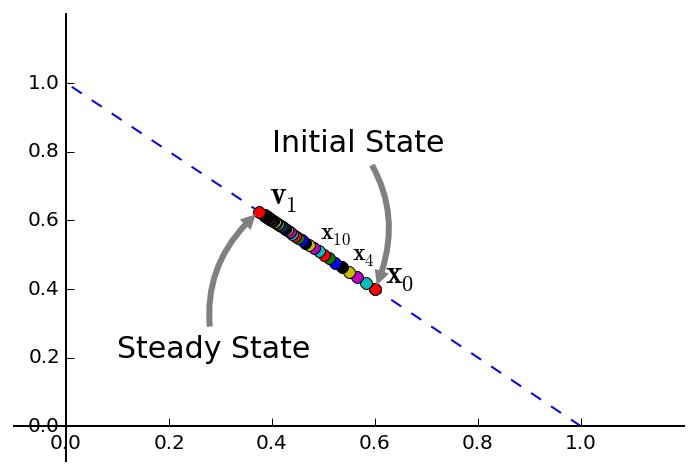

In [17]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-0.1,1.2,-0.1,1.2)
ut.centerAxes(ax)
A = np.array([[0.95,0.03],[0.05,0.97]])
v1 = np.array([0.375,0.625])
v2 = np.array([0.225,-0.225])
x0 = v1 + v2
#
ax.plot([1,0],[0,1],'b--')
ax.text(v1[0]+0.02,v1[1]+0.02,r'${\bf v_1}$',size=16)
ax.plot(x0[0],x0[1],'bo')
v = np.zeros((40,2))
for i in range(40):
    v[i] = v1+(0.92**i)*v2
    ax.plot(v[i,0],v[i,1],'o')
ax.text(v[4][0]+0.02,v[4][1]+0.02,r'${\bf x_4}$',size=12)
ax.text(v[10][0]+0.02,v[10][1]+0.02,r'${\bf x_{10}}$',size=12)
ax.text(x0[0]+0.02,x0[1]+0.02,r'${\bf x_0}$',size=16)
ax.plot(v1[0],v1[1],'ro')
#ax.text(A.dot(x0)[0]+0.2,A.dot(x0)[1]+0.2,r'$A{\bf x_0}$',size=16)
# ax.plot([-10,10],[5*10/6.0,-5*10/6.0],'b-')
#
ax.annotate('Steady State', xy=(v1[0], v1[1]),  xycoords='data',
                xytext=(0.1, 0.2), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0.5', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=-0.3'},
                )
ax.annotate('Initial State', xy=(v[0,0], v[0,1]),  xycoords='data',
                xytext=(0.4, 0.8), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0.5', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=-0.3'},
                )
print('')